# matplotlib常用绘图指令整理
---
这里给的东西足够用于表现数据了，但要是想作出出版物质量的图像，请参阅：
[官方用户手册](https://matplotlib.org/api/pyplot_summary.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# 仅用于jupyter notebook, 创建交互式的图表

In [2]:
data_linear = np.arange(100)
data_diverge = data_linear*np.sin(data_linear)
data_randn = np.random.randn(1000000)
data_scattered = np.arange(100) + np.random.randn(100)

## 绘图区域设置

**绘图区域名词解释**
![plot_components](./images/matplot_components.jpg)

### 一个plot一张图

<IPython.core.display.Javascript object>


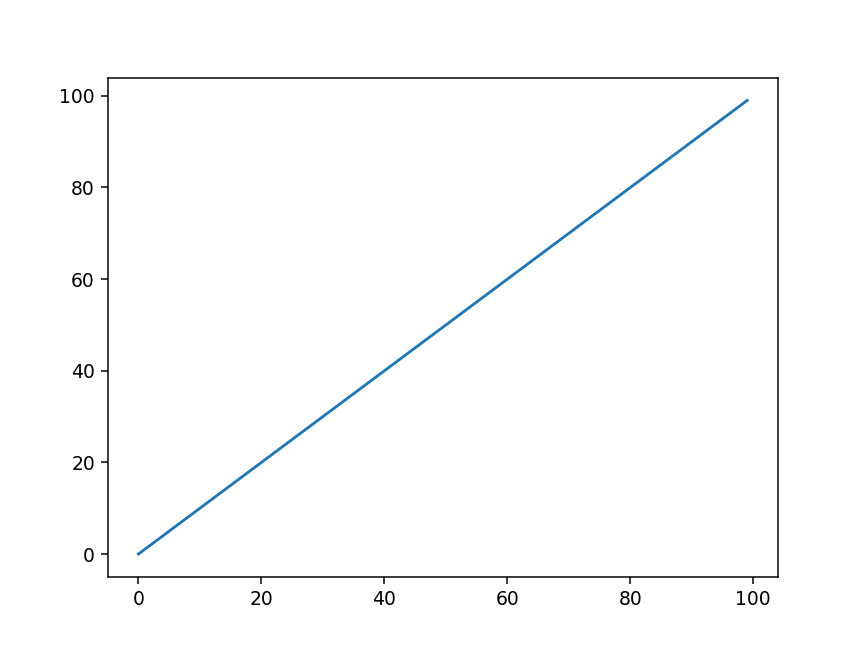

In [62]:
plt.plot(data_linear)

### 子区域划分

In [1]:
#创建figure对象
fig = plt.figure()

#在figure对象下添加subplot对象
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 1, 2)

#默认在最后创建的子区域中绘图
plt.plot(data_linear.cumsum(), 'bo--',MarkerSize=1,linewidth=0.2)

#指定子区域绘图
hist_bin = ax1.hist(data_randn, bins=1000, color='r', alpha=0.8) #条状图
ax2.scatter(data_linear, data_scattered, s=0.01, alpha=1) #散点图

NameError: name 'mpl' is not defined

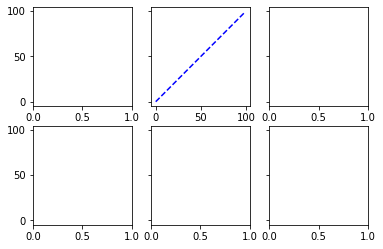

In [5]:
#直接创建若干子区域
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True)

#利用axes索引指定子区域
axes[0, 1].plot(data_linear, 'b--')

### 绘图参数调整

<IPython.core.display.Javascript object>


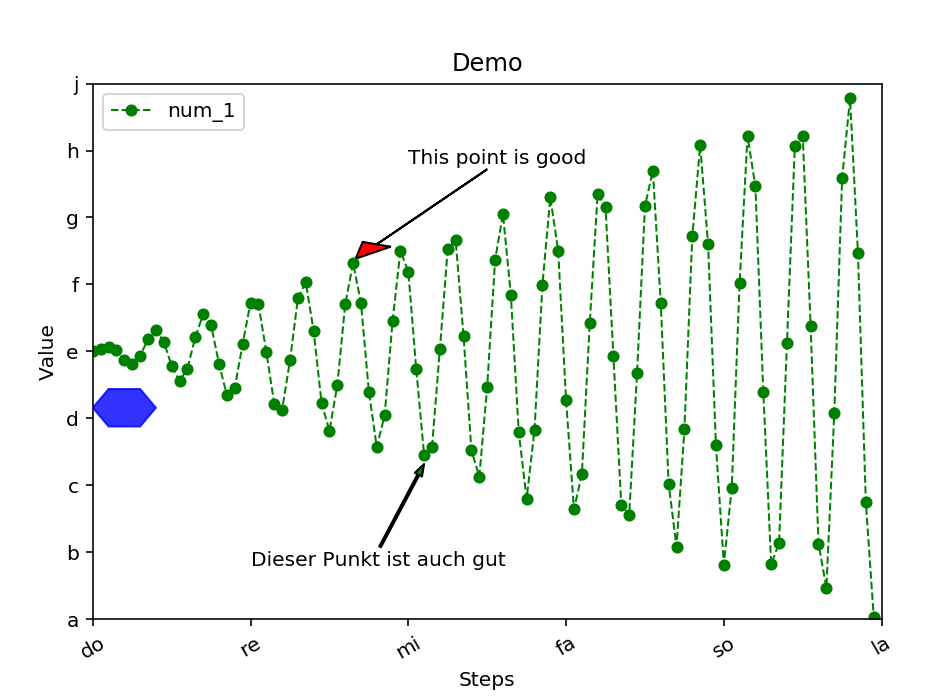

In [8]:
%matplotlib notebook 
#jupyter notebook 魔法方程之一，专用于可交互matplotlib图像
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data_linear, data_diverge)

In [10]:
# 调整figure对象位置，以及subplot间距比例
plt.subplots_adjust(left=0.1, bottom=None, right=0.95,
                    top=None, wspace=0.2, hspace=0.3)
# 指定线形、点型、颜色、曲线标签
ax.clear()
ax.plot(data_linear, data_diverge, 'go--',
        markersize=5, linewidth=1, label='num_1')

In [11]:
#指定坐标轴上下限，不设参数则返回当前值
plt.xlim()
plt.xlim([0, 100])
plt.ylim([-100, 100])
#指定坐标轴内容，可以用字符串代替
ticks = ax.set_xticks([0, 20, 40, 60, 80, 100])
labels = ax.set_xticklabels(
    ['do', 're', 'mi', 'fa', 'so', 'la'], rotation=30, fontsize='medium')
#指定标题
ax.set_title('Demo')
#指定坐标轴标签
ax.set_xlabel('Steps')
#利用set函数统一设定参数
y_props = {'ylabel': 'Value', 'yticklabels': [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']}
ax.set(**y_props)
#显示曲线标签
ax.legend(loc='upper left')

In [12]:
# 添加文本
ax.text(40, 70, 'This point is good')
# 加个箭头，参数依次为：x起始值、y起始值、x位移、y位移、其余箭头参数
ax.arrow(50, 68, -14, -28, facecolor='red', head_width=4, head_length=6)
# 添加包含箭头和文本的注释，参数依次为：文本内容、箭头指处、文本位置、箭头参数
ax.annotate('Dieser Punkt ist auch gut', xy=(42, -42), xytext=(20, -80),
            arrowprops=dict(facecolor='green', width=1, headwidth=4, headlength=6))
#添加一个几何图形，这里以六边形为例，其他还有rect,circ等
pgon =plt.Polygon([[2,-28],[6,-28],[8,-21],[6,-14],[2,-14],[0,-21]],color='blue',alpha=0.8)
ax.add_patch(pgon)

---
## 不同类别的图像

### 非线性坐标轴

In [4]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

<IPython.core.display.Javascript object>


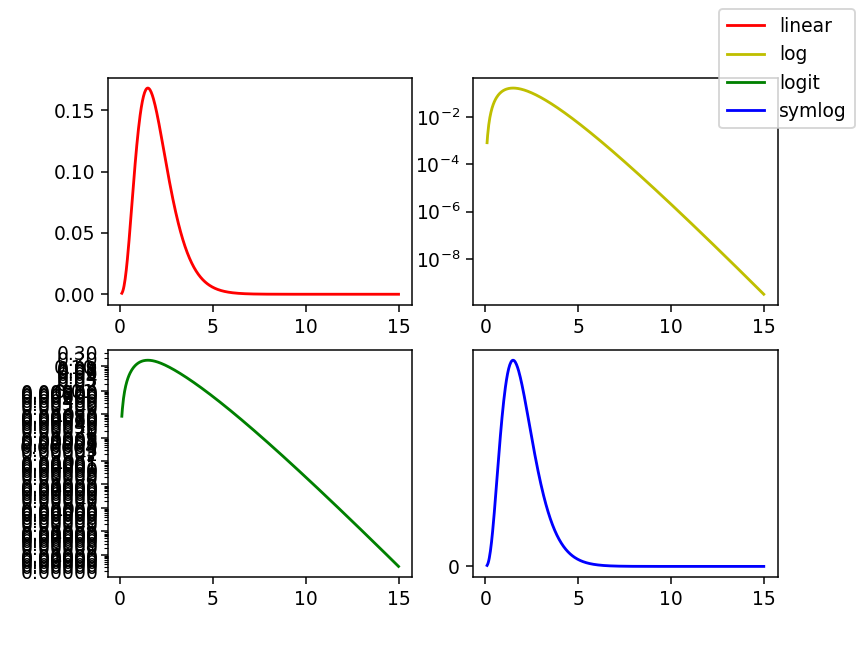

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


In [34]:
# 依次是线性、对数、logit、对称对数坐标轴
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x,y,'r', label="linear")
plt.yscale('linear')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(x,y,'y', label="log")
plt.yscale('log')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(x,y,'g', label="logit")
plt.yscale('logit')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(x,y,'b', label="symlog")
plt.yscale('symlog')

fig.legend(loc="best")

### 角坐标系

<IPython.core.display.Javascript object>


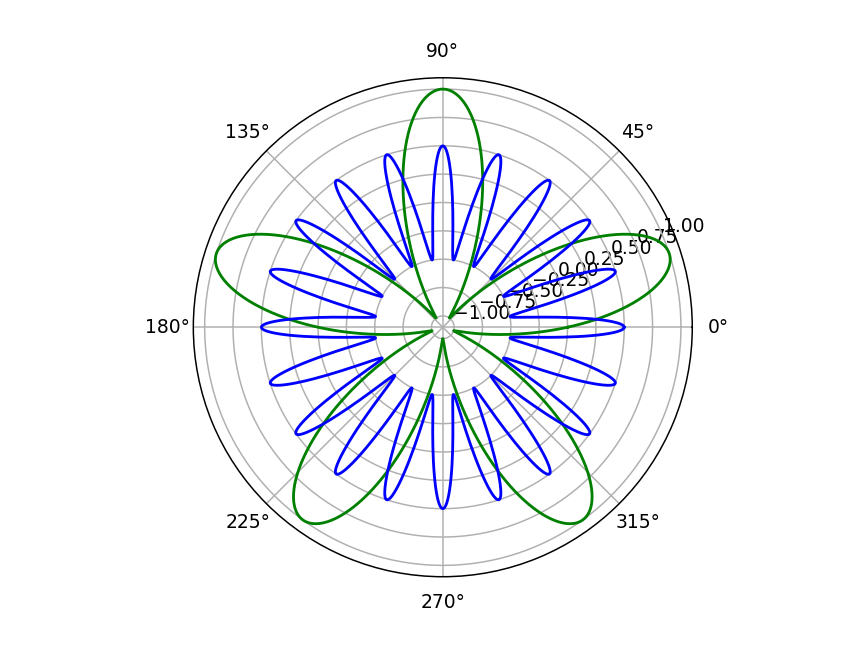

In [53]:
theta = np.linspace(0, 2*np.pi, 1000)
fig=plt.figure()
plt.subplot(1,1,1, projection='polar') #设置'polor'关键词即可生成角坐标系
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

### 三维绘图

In [39]:
from plt_toolkits.pltot3d import Axes3D #需要导入三维坐标系库

<IPython.core.display.Javascript object>


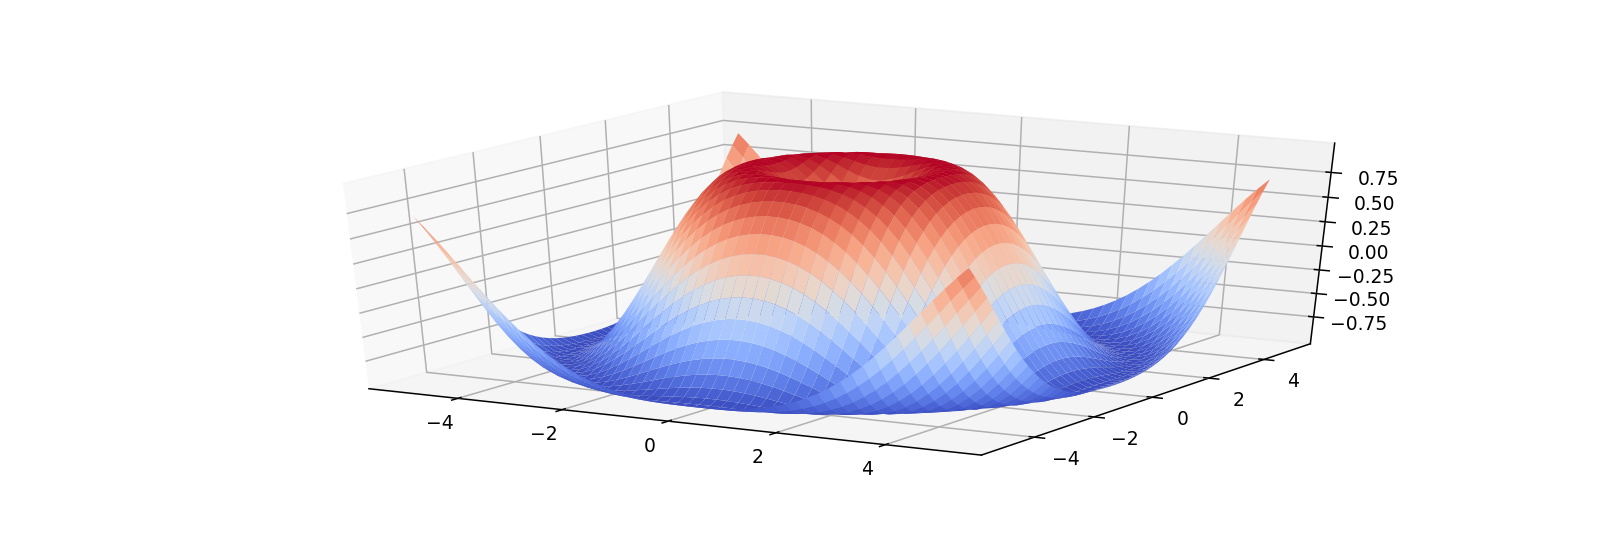

In [44]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
# 生成三维曲面图
figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.1)
plt.show()

<IPython.core.display.Javascript object>


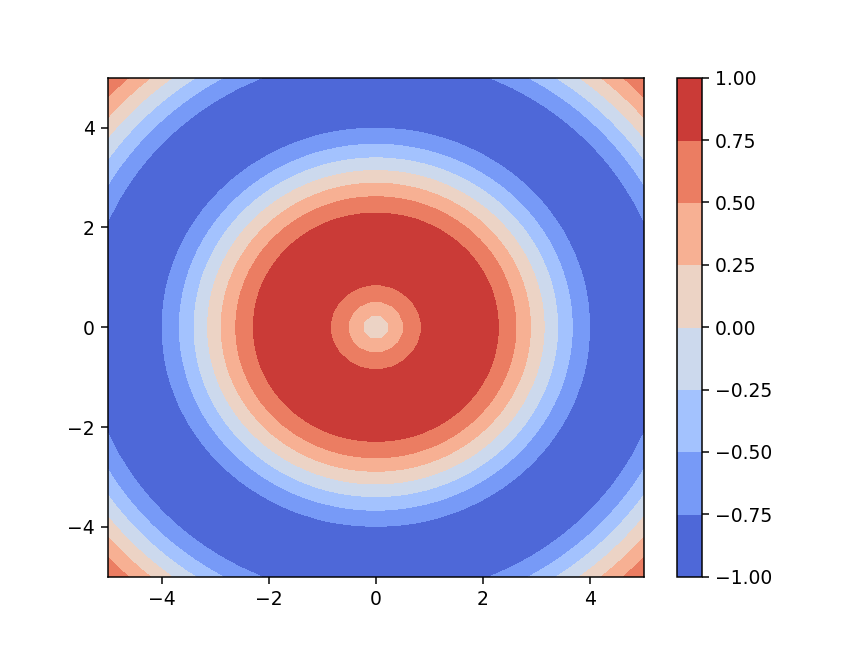

In [56]:
#生成等高线图
figure = plt.figure()
plt.contourf(X, Y, Z, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

### 散点图

<IPython.core.display.Javascript object>


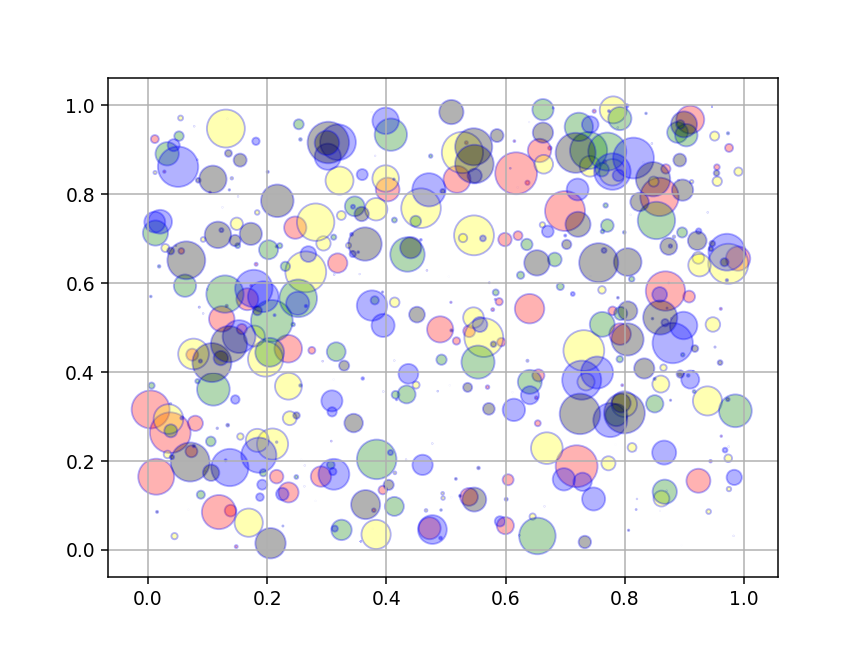

In [58]:
#使用scatter方程生成散点图
plt.figure()
for color in ['red', 'yellow', 'green', 'blue', 'black']:
    n = 100
    x, y = np.random.rand(2, n)
    scale = 500.0 * np.random.rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')
plt.grid(True)
plt.show()

### 柱状图

<IPython.core.display.Javascript object>


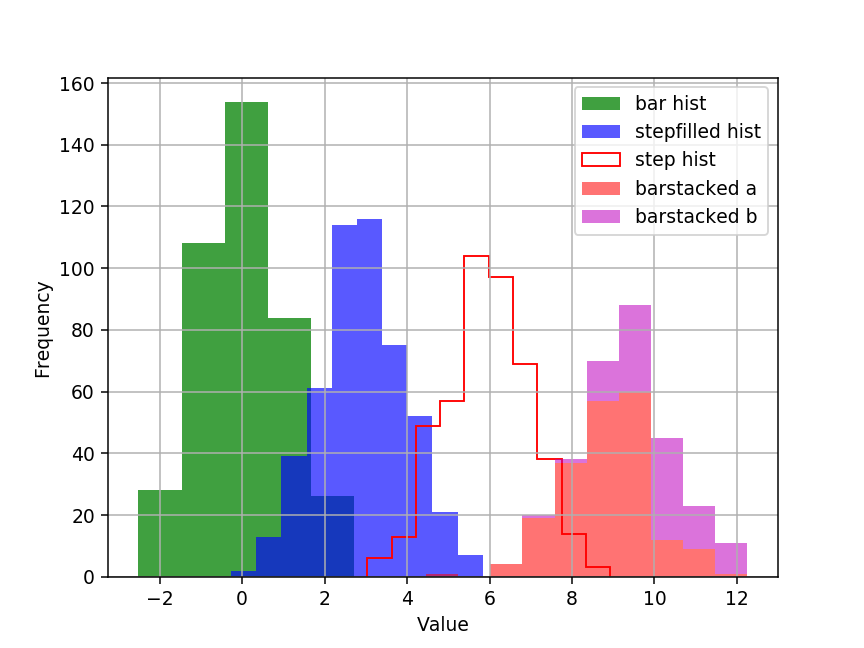

In [59]:
plt.figure()

data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10
# 各种不同式样的柱状图
plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

---
## 绘图文件处理

### 图像文件的保存

In [13]:
#保存图像文件到当前工作目录，分辨率取400*400，留白最少
fig.savefig('exp_1.png',dpi=400,bbox_inches='tight')

### 利用OpenCV读取图像

<IPython.core.display.Javascript object>


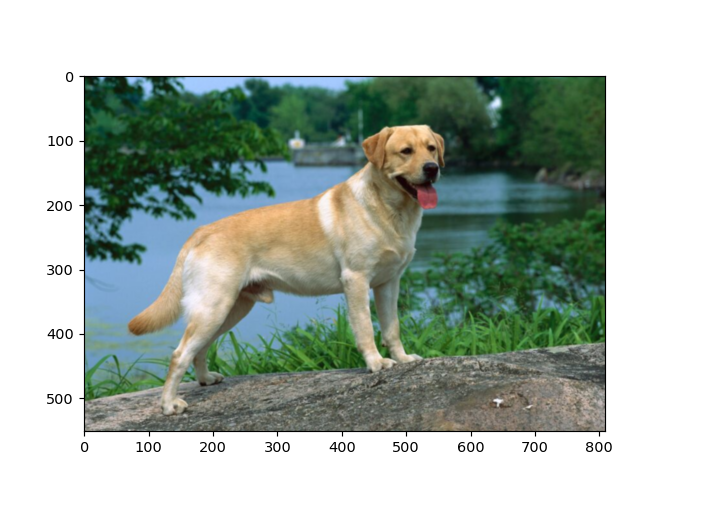

In [11]:
import cv2 as cv
img = cv.imread('images/labrador.jpg', -1)
b,g,r = cv.split(img) #CV2遵循BGR通道，而Matplotlib则为RGB，需要对此处理
img_RGB = cv.merge([r,g,b])
plt.imshow(img_RGB, cmap='gray', interpolation='bicubic')
plt.show()